# Clase 5 - Introduccion a Pandas

<div>
<img src="https://files.realpython.com/media/Reading-and-Writing-Data-With-Pandas_Watermarked.435ef1c38466.jpg" width="500"/>
</div>

Pandas es un paquete que permite realizar analisis y manipulacion de datos de una manera muy similar a la vista en el lenguaje R , esta basada en NumPy lo cual significa que hace uso de NumPy pero busca proveer facilidades y funcionalidad adicional, esto  a traves del uso de 2 estructuras de datos principales :

* **Series** : arreglo unidimensional de datos parecido  los vectores de NumPy 
* **DataFrames** : arreglo rectangular o bi-dimensional organizado en filas y columnas(similar a las matrices en NumPy), algunas de sus caracteristicas y ventajas son:
    * Combinar columnas de diferentes tipos de datos.
    * Es posible manejar nombre tanto para las columnas como para las filas. 
    
 
Existen multiples formas de crear estructuras de datos de Pandas (tanto series como dataframes)  y un escenario muy comun es hacerlo utilizando una estructura de NumPy existente, o bien utilizando funciones de lectura de datos externos(como leer un archivo csv o excel).

Pandas no es un paquete por defecto y debe ser instalado, si usamos Anaconda es bastante sencillo agregarlo a nuestro ambiente de trabajo.

In [2]:
import numpy as np
import pandas as pd # tal como es casi un estandar importar NumPy bajo el alias np, en pandas es casi un estandar usar pd

Existen multiples formas de crear estructuras de datos de Pandas (tanto series como dataframes)  y un escenario muy comun es hacerlo utilizando una estructura de NumPy existente, o bien utilizando funciones de lectura de datos externos(como leer un archivo csv o excel).


In [34]:
numpy_data = np.array([1,2,3,6,4,5])
pandas_data = pd.Series(numpy_data)
print(numpy_data)
print(pandas_data)
print(numpy_data.shape)
print(pandas_data.shape)

[1 2 3 6 4 5]
0    1
1    2
2    3
3    6
4    4
5    5
dtype: int64
(6,)
(6,)


Podemos especificar los "indices" de una serie para poder hacer "indexing" con valores a conveniencia(no necesariamente de 0 a n-1)

In [41]:
numpy_data = np.linspace(1,10,5)
pandas_data = pd.Series(numpy_data,
                        index=[1,2,10,4,5])

print(numpy_data)
print(pandas_data)

[ 1.    3.25  5.5   7.75 10.  ]
1      1.00
2      3.25
10     5.50
4      7.75
5     10.00
dtype: float64


In [43]:
print(pandas_data[1])
print(pandas_data[2])
print(pandas_data[10])

1.0
3.25
5.5


In [45]:
numpy_data = np.linspace(1,10,5)
pandas_data = pd.Series(numpy_data,
                        index=["uno","dos","tres","cuatro","cinco"])

print(pandas_data)

uno        1.00
dos        3.25
tres       5.50
cuatro     7.75
cinco     10.00
dtype: float64


In [47]:
print(pandas_data["uno"])
print(pandas_data["dos"])
print(pandas_data["cinco"])

1.0
3.25
10.0


Podemos crear una serie de pandas a partir de un diccionario, las llaves seran los "indices" y valores serian los datos de la serie

In [48]:
data = {'a' : 0., 'b' : 1., 'c' : 2.}
serie = pd.Series(data)

print(serie)

a    0.0
b    1.0
c    2.0
dtype: float64


In [49]:
serie["b"]

1.0

Para crear dataframes usamos  pd.Dataframe y le enviamos los parametros correspondientes, por ejemplo para crear un databrame de 2 columnas  (nombre,edad) usamos una lista de listas, donde cada lista interior corresponde a una fila del dataframe:

In [50]:
data = [['Alex',10],
        ['Bob',12],
        ['Clarke',13]]

pandas_dataframe = pd.DataFrame(data, columns=['Name','Age'])
print(pandas_dataframe)

     Name  Age
0    Alex   10
1     Bob   12
2  Clarke   13


In [52]:
pandas_dataframe

,Name,Age
0,Alex,10
1,Bob,12
2,Clarke,13


In [53]:
pandas_dataframe.columns

Index(['Name', 'Age'], dtype='object')

In [56]:
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data)

df

,Name,Age
0,Tom,28
1,Jack,34
2,Steve,29
3,Ricky,42


In [59]:
df["Name"]

0      Tom
1     Jack
2    Steve
3    Ricky
Name: Name, dtype: object

In [20]:
df["Age"]

0    28
1    34
2    29
3    42
Name: Age, dtype: int64

Para acceder multiples columnas usamos una lista de nombres.

In [61]:
df[["Name","Age"]]

,Name,Age
0,Tom,28
1,Jack,34
2,Steve,29
3,Ricky,42


In [64]:
columnas = ["Age", "Name"]

df[columnas]

,Age,Name
0,28,Tom
1,34,Jack
2,29,Steve
3,42,Ricky


In [21]:
columnas = ["Name","Age"]
df[columnas]

,Name,Age
0,Tom,28
1,Jack,34
2,Steve,29
3,Ricky,42


Cada columna del dataframe es un objeto tipo series ,por lo cual agregar una columna es equivalente a agregar una serie.

In [66]:
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data)

df["age_when_started_college"] = pd.Series([17,18,19,18])

df

,Name,Age,age_when_started_college
0,Tom,28,17
1,Jack,34,18
2,Steve,29,19
3,Ricky,42,18


Es posible crear nuevas columnas a partir de calculos usando otras existentes

In [73]:
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data)

df["age_when_started_college"] = pd.Series([17,18,19,18])

df["years_after_college"] = df["Age"] - df["age_when_started_college"]
df

,Name,Age,age_when_started_college,years_after_college
0,Tom,28,17,11
1,Jack,34,18,16
2,Steve,29,19,10
3,Ricky,42,18,24


In [78]:
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data)

df["age_when_started_college"] = pd.Series([17,18,19,18])

df["years_after_college"] = df["Age"] - df["age_when_started_college"]

#df.to_csv("test.csv", index=False)
#df

Es posible borrar columnas(por ejemplo si se tiene una columna con datos irrelevantes para cierto proyecto) usando :

* La sentencia del de Python
* la funcion pop(columna) de pandas.

In [76]:
del df["age_when_started_college"]

df

,Name,Age,years_after_college
0,Tom,28,11
1,Jack,34,16
2,Steve,29,10
3,Ricky,42,24


In [77]:
df.pop("years_after_college")

df

,Name,Age
0,Tom,28
1,Jack,34
2,Steve,29
3,Ricky,42


In [87]:
df2 = df.drop(columns=['age_when_started_college'])

In [ ]:
df.drop(columns=['age_when_started_college'], inplace=True)

In [91]:
df

,Name,Age,years_after_college
0,Tom,28,11
1,Jack,34,16
2,Steve,29,10
3,Ricky,42,24


In [93]:
df2

,Name,Age,years_after_college
0,Tom,28,11
1,Jack,34,16
2,Steve,29,10
3,Ricky,42,24


Para seleccion y acceso por filas, debemos usar las propiedades :
* **loc** : por nombre y/o etiqueta(identificador)
* **iloc**: por posicion(similar a indexing y slicing de Numpy)

In [94]:
d = {'one' : pd.Series([1, 2, 3],  index=['a', 'b', 'c']), 
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)

df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [95]:
df.loc["d"]

one    NaN
two    4.0
Name: d, dtype: float64

In [97]:
df.iloc[1:4]

,one,two
b,2.0,2
c,3.0,3
d,NaN,4


In [98]:
df[1:4]

,one,two
b,2.0,2
c,3.0,3
d,NaN,4


Para agregar nuevas filas o combinar 2 dataframes usamos la funcion **append**

In [3]:
pd.__version__

'1.5.3'

In [6]:
df = pd.DataFrame([[1, 2], 
                   [3, 4]], columns = ['a','b'])
df2 = pd.DataFrame([[5, 6], 
                    [7, 8]], columns = ['a','b'])

df3 = pd.concat([df, df2])

df3

,a,b
0,1,2
1,3,4
0,5,6
1,7,8


In [8]:
df3.loc[1]

,a,b
1,3,4
1,7,8


Para borrar filas usamos la funcion drop

In [9]:
df = pd.DataFrame([[1, 2], [3, 4]], columns = ['a','b'])
df2 = pd.DataFrame([[5, 6], [7, 8]], columns = ['a','b'])

df = df.append(df2)

df

/tmp/ipykernel_421024/1631044588.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


,a,b
0,1,2
1,3,4
0,5,6
1,7,8


In [10]:
dropped_df = df.drop(0)

dropped_df

,a,b
1,3,4
1,7,8


In [12]:
df.drop(0, inplace=True)

In [13]:
df

,a,b
1,3,4
1,7,8


### Propiedades utiles 

Similar a como  tensores de Numpy poseeian propiedeades utiles(por ejemplo ndim, shape) las estructuras de Pandas poseen propiedades utiles, algunas heredadas de NumPy y otras propias (por ejemplo head() y tail() )

Transpuesta con .T

In [15]:
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df_original = pd.DataFrame(data)

df = df_original.T

df_original

,Name,Age
0,Tom,28
1,Jack,34
2,Steve,29
3,Ricky,42


In [16]:
df

,0,1,2,3
Name,Tom,Jack,Steve,Ricky
Age,28,34,29,42


In [17]:
df.loc["Age"]

0    28
1    34
2    29
3    42
Name: Age, dtype: object

In [18]:
df.iloc[1]

0    28
1    34
2    29
3    42
Name: Age, dtype: object

In [19]:
df[0]

Name    Tom
Age      28
Name: 0, dtype: object

Total de elementos con .size

In [20]:
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data)

df.size

8

In [21]:
df.shape

(4, 2)

In [42]:
df

,Name,Age
0,Tom,28
1,Jack,34
2,Steve,29
3,Ricky,42


In [22]:
len(df)

4

La forma del dataframe con .shape (similar al usado en numpy)

In [44]:
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data)

df

,Name,Age
0,Tom,28
1,Jack,34
2,Steve,29
3,Ricky,42


In [49]:
df.shape

(4, 2)

Arreglo de NumPy con los datos del dataframe usando .values

In [23]:
df

,Name,Age
0,Tom,28
1,Jack,34
2,Steve,29
3,Ricky,42


In [28]:
datos_casas = pd.DataFrame([[1,2],
                        [3,4]],
                        columns=["precio","tamaño"])

np.matmul(datos_casas.values,
          np.array([0,0]))

array([0, 0])

In [32]:
datos_casas.values.shape

(2, 2)

In [31]:
datos_casas['precio'].values.shape

(2,)

Consultar los primeros o ultimos rows del dataframe(muy util para analisis exploratorio)

In [33]:
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data)


df.head(2)

,Name,Age
0,Tom,28
1,Jack,34


In [34]:
df.tail(2)

,Name,Age
2,Steve,29
3,Ricky,42


In [35]:
df.describe()

,Age
count,4.000000
mean,33.250000
std,6.396614
min,28.000000
25%,28.750000
50%,31.500000
75%,36.000000
max,42.000000


### Estadistica descriptiva

Similar al caso de NumPy ,podemos usar pandas para realizar estadistica descriptiva sobre nuestros dataframes, y de manera similar a NumPy podemos especificar  el "axis" a utilizar, ademas de poseer caracteristicas adicionales.

In [38]:
np_data = [[1,2,3,4],
           [5,6,7,8],
           [4,3,2,1],
           [4,5,6,7]]
pandas_data = pd.DataFrame(np_data)
pandas_data

,0,1,2,3
0,1,2,3,4
1,5,6,7,8
2,4,3,2,1
3,4,5,6,7


In [40]:

pandas_data.sum(axis=0)

10


0    14
1    16
2    18
3    20
dtype: int64

In [41]:
print(1+2+3+4)
pandas_data.sum(axis=1)

10


0    10
1    26
2    10
3    22
dtype: int64

Debemos tener en cuenta los tipos de datos de cada columna al usar funciones de agregacion y/o estadistica:

In [42]:
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data)

df

,Name,Age
0,Tom,28
1,Jack,34
2,Steve,29
3,Ricky,42


In [43]:
df.sum()

Name    TomJackSteveRicky
Age                   133
dtype: object

Veamos como ejemplo la media

In [52]:
np_data = [[1,2,3,4],
           [5,6,7,8],
           [4,3,2,1]]
pandas_data = pd.DataFrame(np_data)

pandas_data.mean(axis=1)

0    2.5
1    6.5
2    2.5
dtype: float64

In [51]:
pandas_data.mean(axis=0)

0    3.333333
1    3.666667
2    4.000000
3    4.333333
dtype: float64

Podemos utilizar muchas de las funciones que ya aprendimos en NumPy sobre un dataframe de pandas, por ejemplo **std()** y otras adicionales propias de pandas , por ejemplo la moda con **mode()**

### describe

Una funcion muy utilizada  en Pandas  y no existente en NumPy es **describe** la cual busca generar un resumen descriptivo  de cierto dataframe,  esta funcion es muy util en la etapa de analisis exploratorio.

In [46]:
pandas_data

,0,1,2,3
0,1,2,3,4
1,5,6,7,8
2,4,3,2,1
3,4,5,6,7


In [47]:
pandas_data.describe()

,0,1,2,3
count,4.000000,4.000000,4.000000,4.000000
mean,3.500000,4.000000,4.500000,5.000000
std,1.732051,1.825742,2.380476,3.162278
min,1.000000,2.000000,2.000000,1.000000
25%,3.250000,2.750000,2.750000,3.250000
50%,4.000000,4.000000,4.500000,5.500000
75%,4.250000,5.250000,6.250000,7.250000
max,5.000000,6.000000,7.000000,8.000000


In [48]:
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data)

df.describe()

,Age
count,4.000000
mean,33.250000
std,6.396614
min,28.000000
25%,28.750000
50%,31.500000
75%,36.000000
max,42.000000


In [49]:
resumen = df.describe()

resumen.loc["min"]["Age"]

28.0

### Otras funciones utiles en analisis de datos

Pandas provee de cajon muchas funciones utiles para analisis de datos , por ejemplo :

* group by: https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.groupby.html
* window functions : https://pandas.pydata.org/pandas-docs/stable/reference/window.html
    * https://towardsdatascience.com/window-functions-in-pandas-eaece0421f7
* sustitucion de valores faltantes : https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html
* merge:https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

   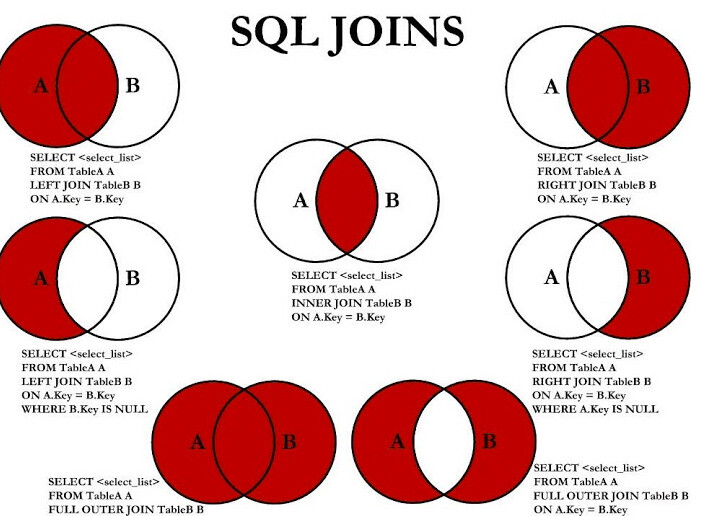

### Entrada y salida de datos

Es posible tanto leer con Pandas , como escribir un dataframe de Pandas a almacenamiento  en una gran variedad de formatos y fuentes ,por ejemplo archivos .csv , archivos excel, Json, queries a bases de datos con SQL, etc, la referencia oficial es: https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

In [3]:
url = 'https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/baseball.csv'

tips=pd.read_csv(url)

tips.head(10)

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,88641,womacto01,2006,2,CHN,NL,19,50,6,14,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
1,88643,schilcu01,2006,1,BOS,AL,31,2,0,1,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,88645,myersmi01,2006,1,NYA,AL,62,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,88649,helliri01,2006,1,MIL,NL,20,3,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
4,88650,johnsra05,2006,1,NYA,AL,33,6,0,1,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0
5,88652,finlest01,2006,1,SFN,NL,139,426,66,105,...,40.0,7.0,0.0,46,55.0,2.0,2.0,3.0,4.0,6.0
6,88653,gonzalu01,2006,1,ARI,NL,153,586,93,159,...,73.0,0.0,1.0,69,58.0,10.0,7.0,0.0,6.0,14.0
7,88662,seleaa01,2006,1,LAN,NL,28,26,2,5,...,0.0,0.0,0.0,1,7.0,0.0,0.0,6.0,0.0,1.0
8,89177,francju01,2007,2,ATL,NL,15,40,1,10,...,8.0,0.0,0.0,4,10.0,1.0,0.0,0.0,1.0,1.0
9,89178,francju01,2007,1,NYN,NL,40,50,7,10,...,8.0,2.0,1.0,10,13.0,0.0,0.0,0.0,1.0,1.0


In [61]:
tips.shape

(100, 23)

Editando el dataset y escribiendo el resultado a disco.


In [55]:
#tips = tips.iloc[0:5]

tips

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,88641,womacto01,2006,2,CHN,NL,19,50,6,14,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
1,88643,schilcu01,2006,1,BOS,AL,31,2,0,1,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,88645,myersmi01,2006,1,NYA,AL,62,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,88649,helliri01,2006,1,MIL,NL,20,3,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
4,88650,johnsra05,2006,1,NYA,AL,33,6,0,1,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


In [62]:
tips['year'].unique()

array([2006, 2007])

In [63]:
tips['player'].unique()

array(['womacto01', 'schilcu01', 'myersmi01', 'helliri01', 'johnsra05',
       'finlest01', 'gonzalu01', 'seleaa01', 'francju01', 'zaungr01',
       'witasja01', 'williwo02', 'wickmbo01', 'whitero02', 'whiteri01',
       'wellsda01', 'weathda01', 'walketo04', 'wakefti01', 'vizquom01',
       'villoro01', 'valenjo03', 'trachst01', 'timlimi01', 'thomeji01',
       'thomafr04', 'tavarju01', 'sweenma01', 'suppaje01', 'stinnke01',
       'stantmi02', 'stairma01', 'sprinru01', 'sosasa01', 'smoltjo01',
       'sheffga01', 'seaneru01', 'schmija01', 'sandere02', 'rogerke01',
       'rodriiv01', 'ramirma02', 'piazzmi01', 'perezne01', 'parkch01',
       'oliveda02', 'mussimi01', 'moyerja01', 'mesajo01', 'martipe02',
       'maddugr01', 'mabryjo01', 'loftoke01', 'loaizes01', 'kleskry01',
       'kentje01', 'jonesto02', 'hoffmtr01', 'hernaro01', 'guarded01',
       'griffke02', 'greensh01', 'graffto01', 'gordoto01', 'gomezch02',
       'glavito02', 'floydcl01', 'embreal01', 'edmonji01', 'easleda01'

In [64]:
tips[tips['player']=="womacto01"]

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,88641,womacto01,2006,2,CHN,NL,19,50,6,14,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0


In [65]:
tips[tips['player']=="myersmi01"]

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
2,88645,myersmi01,2006,1,NYA,AL,62,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
53,89410,myersmi01,2007,1,NYA,AL,6,1,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
tips.groupby("player").count()

,id,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
player,,,,,,,,,,,,,,,,,,,,,
alomasa02,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
aloumo01,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
ausmubr01,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
benitar01,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
biggicr01,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wickmbo01,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
williwo02,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
witasja01,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [68]:
tips.to_json("result_file.json")

In [69]:
tips.to_csv("result_file.csv",index_label=False)

#### Interactuando con bases de datos

Es muy fácil interactuar con bases de datos al usar Pandas , pero esto se hace a través de otro paquete extra llamado SQL Alchemy , SQL Alchemy y el lenguaje SQL estan fuera del alcance de este curso.

Referencias:

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql_query.html
* https://medium.com/jbennetcodes/how-to-rewrite-your-sql-queries-in-pandas-and-more-149d341fc53e
* https://datatofish.com/sql-to-pandas-dataframe/

### Ploting

In [70]:
import matplotlib.pyplot as plt

In [71]:
df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                    'radius': [2439.7, 6051.8, 6378.1]},
                   index=['Mercury', 'Venus', 'Earth'])

df

,mass,radius
Mercury,0.33,2439.7
Venus,4.87,6051.8
Earth,5.97,6378.1


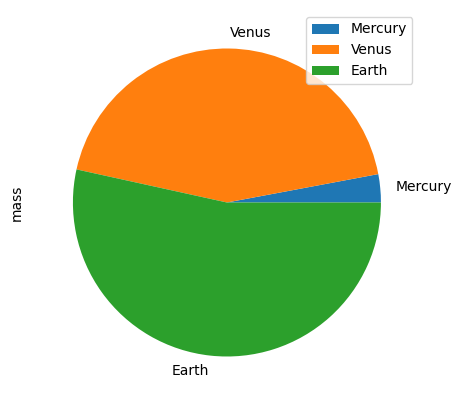

In [72]:
df.plot.pie(y='mass', figsize=(5, 5))
plt.show()

In [89]:
df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})

df

,lab,val
0,A,10
1,B,30
2,C,20


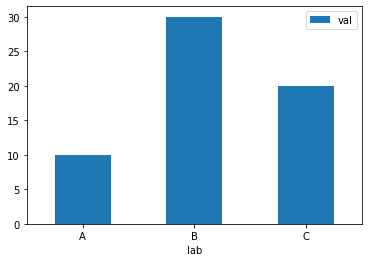

In [90]:

ax = df.plot.bar(x='lab', y='val', rot=0)
plt.show()